# ***This dataset contains serious injury outcome indicators from 2000 to 2023, focusing on various causes of injuries, including assaults and falls. The data includes metrics such as the number of injuries, confidence intervals, and age-standardized rates per 100,000 people.***

# Potential Issues
***Missing Values: Certain entries may have missing data, which can affect the accuracy of analyses and predictions.
Data Reliability: The dataset relies on reported incidents, which may lead to underreporting or overreporting of injuries, affecting the overall validity.
Time Period Limitations: The dataset spans over two decades, which may not capture recent trends or changes in injury patterns.
Categorical Encoding: The classification of injury types and severity may require careful consideration to avoid misinterpretation.***

# ***1-Libraries Used:***

    Pandas: For data manipulation and analysis.
    NumPy: For numerical operations.
    Matplotlib & Seaborn: For static and advanced data visualizations.
    Plotly: For interactive plots.
    Scikit-learn: For machine learning models and metrics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show, output_notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')



# Data Loading:

    The notebook loads a CSV file containing RGB values and their corresponding coordinates.



In [2]:
data= pd.read_csv('/kaggle/input/serious-injury-outcome-indicators-2000-2023/serious-injury-outcome-indicators-2000-2023.csv')



# Data Exploration:

    Displays the first few rows of the dataset to understand its structure.
    Provides a summary of the data, including the number of entries and data types.
    Checks for missing values to ensure data integrity.



In [3]:
data.head()

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,W_A11,2000-02,Moving average,59.666667,50.925823,68.407510,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
1,W_A11,2001-03,Moving average,60.000000,51.234775,68.765225,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2002-04,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2003-05,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2004-06,Moving average,61.333333,52.471252,70.195415,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3094 entries, 0 to 3093
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  3094 non-null   object 
 1   Period            3094 non-null   object 
 2   Type              3094 non-null   object 
 3   Data_value        3094 non-null   float64
 4   Lower_CI          3094 non-null   float64
 5   Upper_CI          3094 non-null   float64
 6   Units             3094 non-null   object 
 7   Indicator         3094 non-null   object 
 8   Cause             3094 non-null   object 
 9   Validation        3094 non-null   object 
 10  Population        3094 non-null   object 
 11  Age               3094 non-null   object 
 12  Severity          3094 non-null   object 
dtypes: float64(3), object(10)
memory usage: 314.4+ KB


In [5]:
data.isna()

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,False,False,False,False,False,False,False,False,False,False,False,False,False
3090,False,False,False,False,False,False,False,False,False,False,False,False,False
3091,False,False,False,False,False,False,False,False,False,False,False,False,False
3092,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Series_reference    0
Period              0
Type                0
Data_value          0
Lower_CI            0
Upper_CI            0
Units               0
Indicator           0
Cause               0
Validation          0
Population          0
Age                 0
Severity            0
dtype: int64

In [7]:
data.describe()

,Data_value,Lower_CI,Upper_CI
count,3094.000000,3094.000000,3094.000000
mean,514.511221,488.336803,540.685640
std,1496.693645,1464.130151,1529.631218
min,0.704672,0.191677,0.782001
25%,15.492449,13.415193,17.448452
50%,64.305039,51.852880,74.054769
75%,322.750000,287.538776,357.961224
max,15271.000000,15028.795711,15513.204289


# data preprocessing 
1- drop nall
2- encoding 

In [8]:
data.dropna(inplace=True)


In [9]:
data.dropna(axis = 1)

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age,Severity
0,W_A11,2000-02,Moving average,59.666667,50.925823,68.407510,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
1,W_A11,2001-03,Moving average,60.000000,51.234775,68.765225,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
2,W_A11,2002-04,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
3,W_A11,2003-05,Moving average,59.000000,50.308125,67.691875,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
4,W_A11,2004-06,Moving average,61.333333,52.471252,70.195415,Injuries,Number,Assault,Validated,Whole pop,All ages,Fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,p21,2016,Single year,36.000000,24.240216,47.759784,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious
3090,p21,2017,Single year,40.000000,27.604099,52.395901,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious
3091,p21,2018,Single year,41.000000,28.450107,53.549893,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious
3092,p21,2019,Single year,34.000000,22.571544,45.428456,Injuries,Number,Pedestrian,Validated,Children,0-14 years,Serious


In [10]:

X = data.drop('Severity', axis=1)  
y = data['Severity']
le = LabelEncoder()
data['Severity'] = le.fit_transform(data['Severity'])
for col in X:
       X[col] =  le.fit_transform(X[col])

In [11]:
 X.head()

,Series_reference,Period,Type,Data_value,Lower_CI,Upper_CI,Units,Indicator,Cause,Validation,Population,Age
0,60,1,0,1318,1347,1344,0,1,1,1,2,3
1,60,3,0,1319,1349,1346,0,1,1,1,2,3
2,60,5,0,1316,1343,1341,0,1,1,1,2,3
3,60,7,0,1316,1343,1341,0,1,1,1,2,3
4,60,9,0,1322,1356,1350,0,1,1,1,2,3


In [12]:
y.head()

0    Fatal
1    Fatal
2    Fatal
3    Fatal
4    Fatal
Name: Severity, dtype: object

# Data Visualization:

    Creates a scatter plot to visualize the relationship between X and Y coordinates

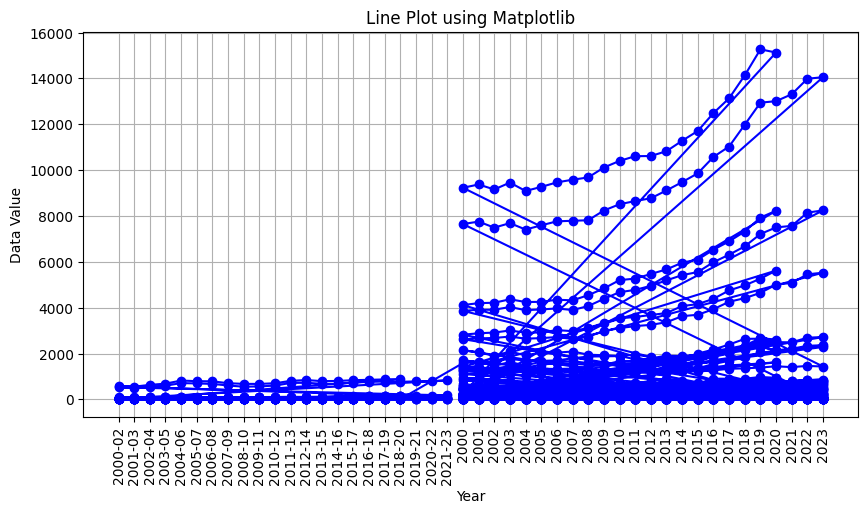

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data['Period'], data['Data_value'], marker='o', color='blue')
plt.title('Line Plot using Matplotlib')
plt.xlabel('Year')
plt.ylabel('Data Value')
plt.xticks(rotation=90)
plt.grid()
plt.show()

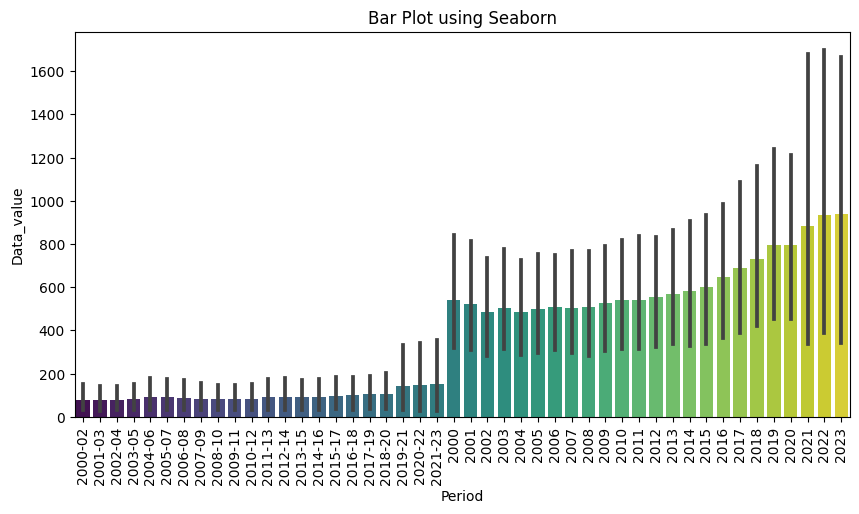

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Period', y='Data_value', data=data, palette='viridis')
plt.title('Bar Plot using Seaborn')
plt.xticks(rotation=90)
plt.show()

In [15]:
output_notebook()
p = figure(title='Scatter Plot using Bokeh', x_axis_label='Period', y_axis_label='Data Value')
p.scatter(data['Period'], data['Data_value'], size=10, color='navy', alpha=0.5)
show(p)

Loading BokehJS ...

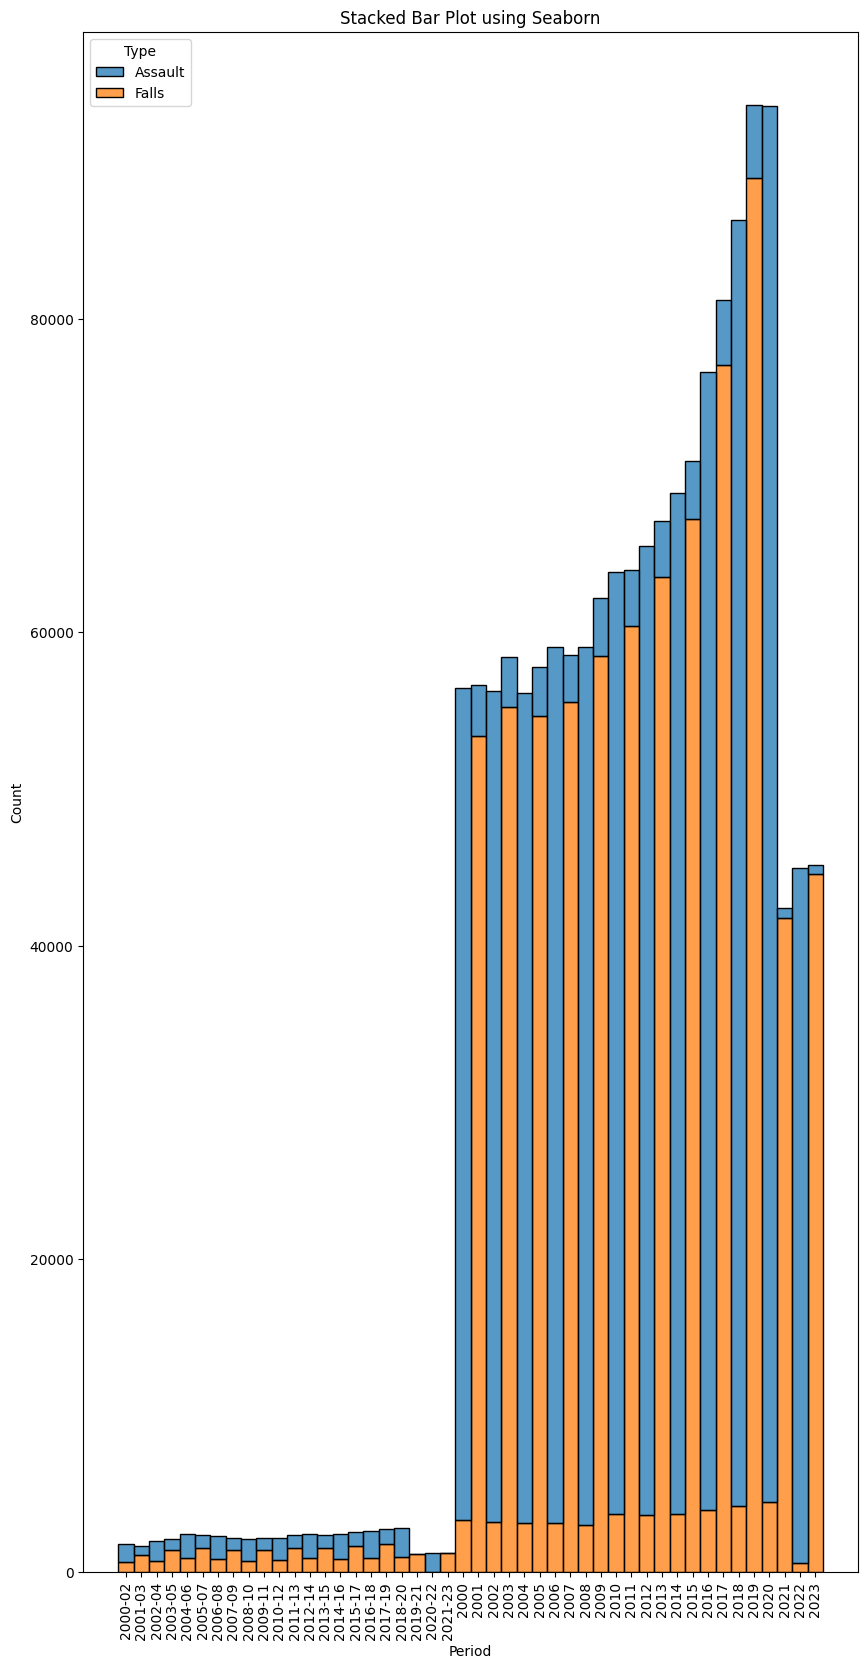

In [16]:
plt.figure(figsize=(10, 20))
data['Type'] = ['Assault', 'Falls'] * (len(data) // 2)  
sns.histplot(data=data, x='Period', weights='Data_value', hue='Type', multiple="stack")
plt.title('Stacked Bar Plot using Seaborn')
plt.xticks(rotation=90)
plt.show()

In [17]:
fig = px.line(data, x='Period', y='Data_value', title='Interactive Line Plot using Plotly')
fig.show()

In [18]:
p = figure(x_range=data['Period'].tolist(), title="Bar Chart using Bokeh", toolbar_location=None, tools="")
p.vbar(x=data['Period'], top=data['Data_value'], width=0.9)
p.xaxis.axis_label = "Period"
p.yaxis.axis_label = "Data Value"
show(p)

In [19]:
fig = px.scatter_3d(data, x='Period', y='Data_value', z='Lower_CI', title='3D Scatter Plot using Plotly')
fig.show()

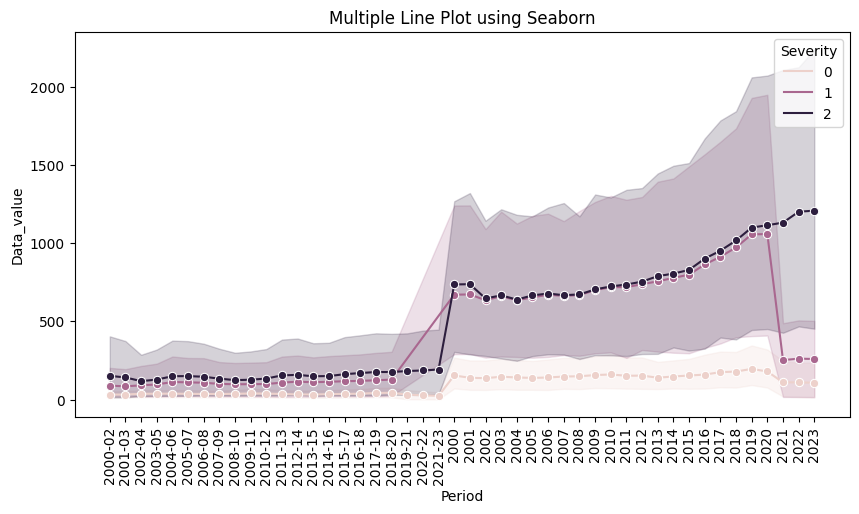

In [20]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Period', y='Data_value', hue='Severity', marker='o')
plt.title('Multiple Line Plot using Seaborn')
plt.xticks(rotation=90)
plt.show()

In [21]:
fig = px.area(data, x='Period', y='Data_value', title='Area Plot using Plotly')
fig.show()

In [22]:
p = figure(title='Line Plot using Bokeh', x_axis_label='Period', y_axis_label='Data Value')
p.line(data['Period'], data['Data_value'], line_width=2)
show(p)

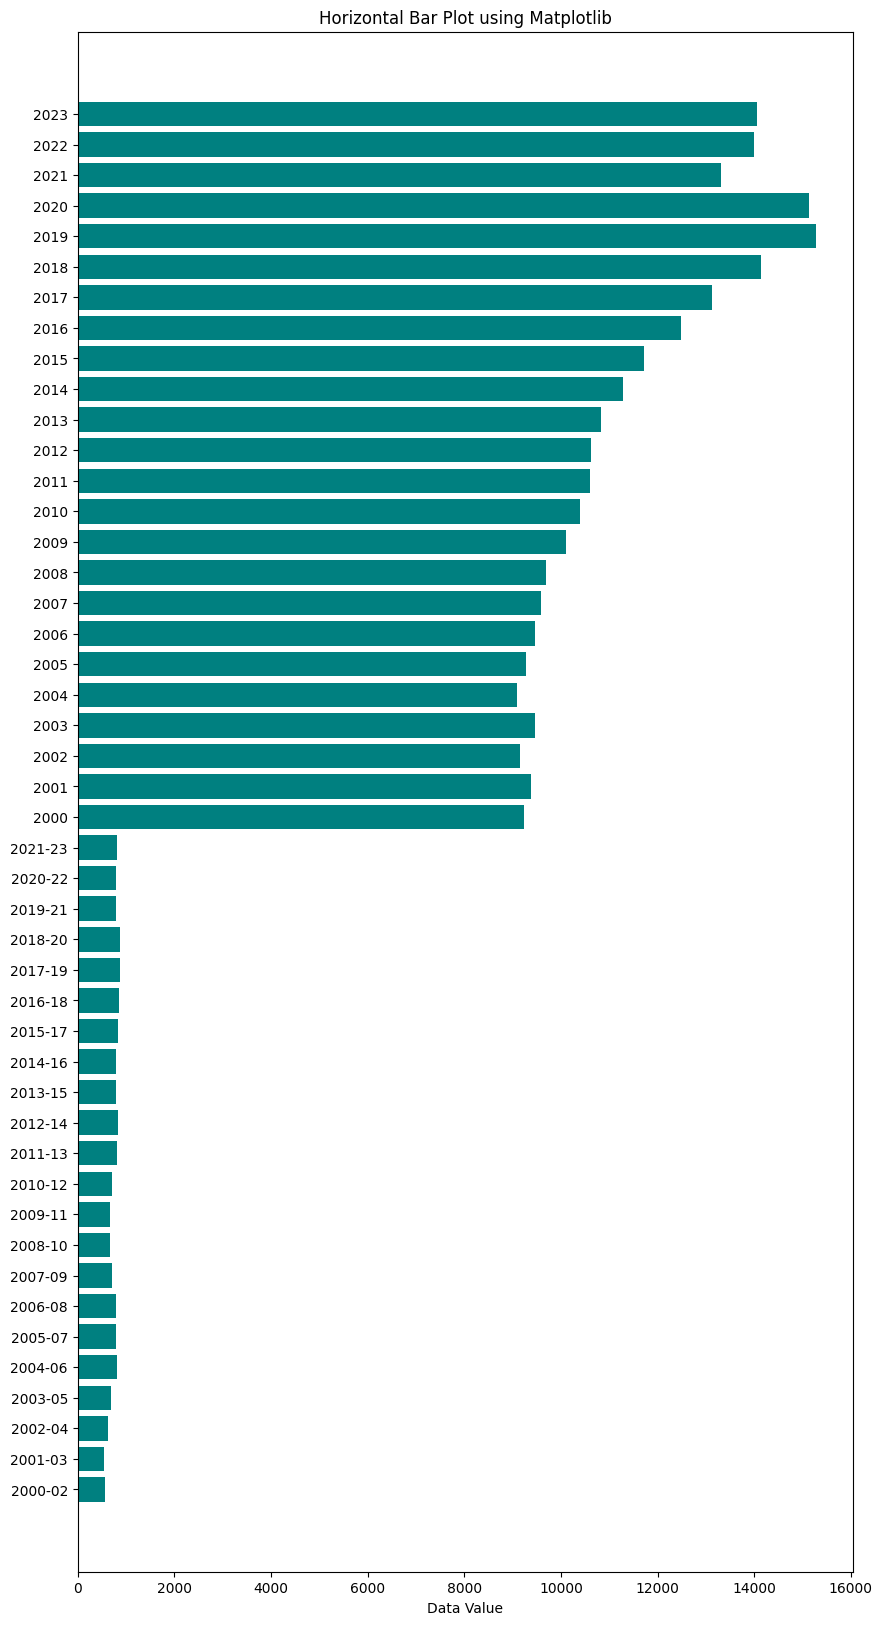

In [23]:
plt.figure(figsize=(10, 20))
plt.barh(data['Period'], data['Data_value'], color='teal')
plt.title('Horizontal Bar Plot using Matplotlib')
plt.xlabel('Data Value')
plt.show()

In [24]:
fig = px.line(data, x='Period', y='Data_value', title='Interactive Line Plot using Plotly')
fig.show()

In [25]:
p = figure(title='Interactive Scatter Plot using Bokeh', x_axis_label='Period', y_axis_label='Data Value')
p.circle(data['Period'], data['Data_value'], size=10, color='red', alpha=0.5)
show(p)

In [26]:
fig = px.scatter(data, x='Period', y='Data_value', color='Severity', title='Scatter Plot using Plotly')
fig.show()

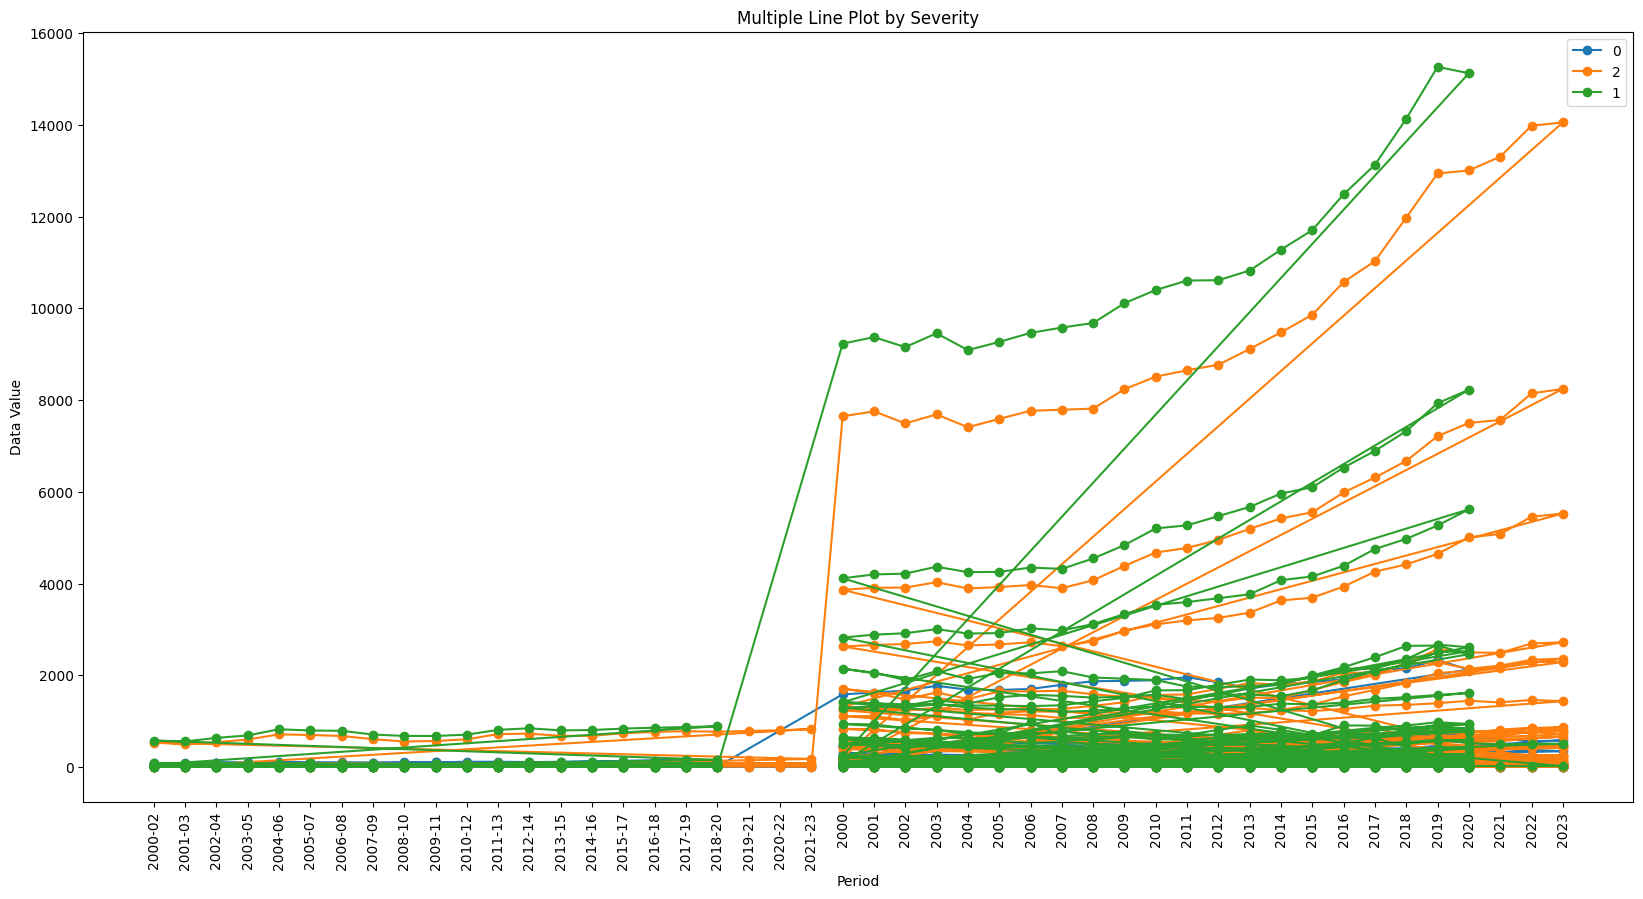

In [27]:
plt.figure(figsize=(20, 10))
for severity in data['Severity'].unique():
    subset = data[data['Severity'] == severity]
    plt.plot(subset['Period'], subset['Data_value'], marker='o', label=severity)
plt.title('Multiple Line Plot by Severity')
plt.xlabel('Period')
plt.ylabel('Data Value')
plt.xticks(rotation=90 )
plt.legend()
plt.show()

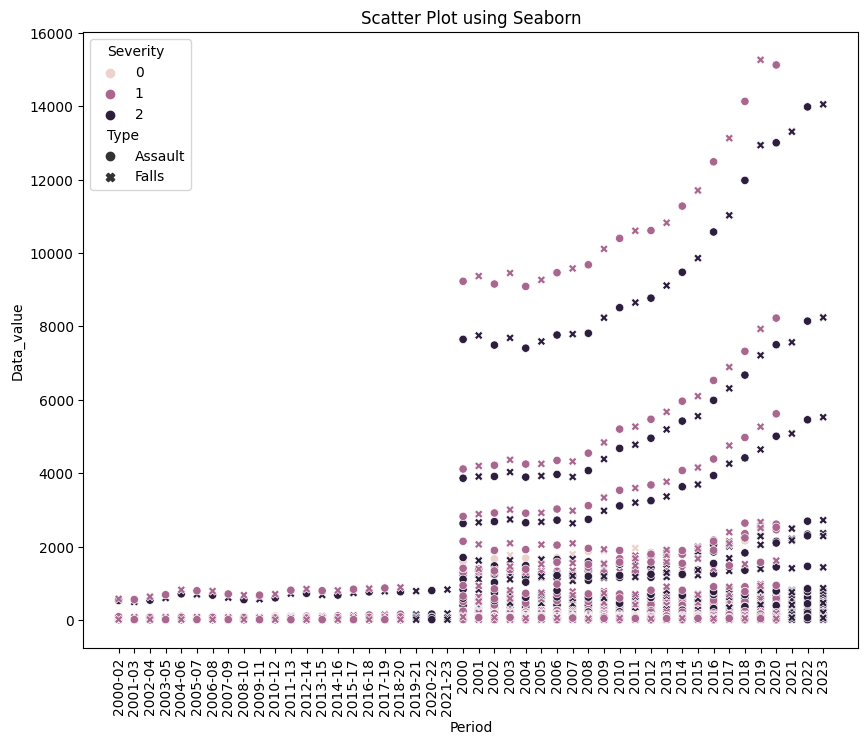

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Period', y='Data_value', hue='Severity', style='Type')
plt.title('Scatter Plot using Seaborn')
plt.xticks(rotation=90 )
plt.show()



# Modele"s and deploy:

    The inclusion of machine learning libraries suggests potential modeling tasks, although specific modeling steps are not detailed in the provided content.



In [29]:
import joblib

In [30]:
def train_models(data):

    X = data.drop('Severity', axis=1)
    y = data['Severity']

    le = LabelEncoder()
    data['Severity'] = le.fit_transform(data['Severity'])
    
    for col in X:
       X[col] = le.fit_transform(X[col])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    
    adboost_model = AdaBoostRegressor()
    adboost_model.fit(X_train, y_train)
    
    GR_boost_model = GradientBoostingRegressor()
    GR_boost_model.fit(X_train, y_train)
    
 
    
    lr_pred = lr_model.predict(X_test)
    rf_pred = rf_model.predict(X_test)
    adboost_pred = adboost_model.predict(X_test)
    GR_boost_pred = GR_boost_model.predict(X_test)
    

    lr_mse = mean_squared_error(y_test, lr_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    adboost_mse = mean_squared_error(y_test, adboost_pred)
    GR_boost_mse = mean_squared_error(y_test, GR_boost_pred )
   

 

   
    joblib.dump(lr_model, 'linear_regression_model.pkl')
    joblib.dump(rf_model, 'random_forest_model.pkl')
    joblib.dump(GR_boost_model, 'GRBoost_model.pkl')
    joblib.dump(adboost_model, 'ada_boost_model.pkl')
   

    return lr_mse, rf_mse, adboost_mse, GR_boost_mse



In [31]:
def analyze_results(lr_mse, rf_mse):
    results = pd.DataFrame({
        'Model': ['Linear Regression', 'Random Forest','AdaBoost' , 'GradientBoosting'],
        'Mean Squared Error': [lr_mse, rf_mse, adboost_mse, GR_boost_mse]
    })
    print(results)
    sns.barplot(x='Model', y='Mean Squared Error', data=results)
    plt.title('Model Performance Comparison')
    plt.show()
    

In [32]:
def predict_and_deploy(model_type, new_data):
    
    model = joblib.load(f'{model_type}_model.pkl')
    
    
    predictions = model.predict(new_data)
    
    
    result_df = pd.DataFrame({
        'Predictions': predictions
    })
    return result_df

In [33]:
lr_mse, rf_mse, adboost_mse, GR_boost_mse = train_models(data)

               Model  Mean Squared Error
0  Linear Regression            0.463158
1      Random Forest            0.014866
2           AdaBoost            0.455264
3   GradientBoosting            0.120011


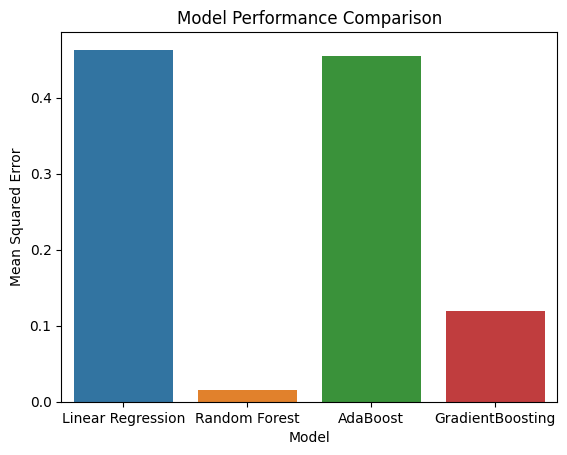

In [34]:
analyze_results(lr_mse, rf_mse)

# Conclusion
Despite these challenges, this dataset provides valuable insights into injury trends and can help inform public health strategies and interventions aimed at reducing serious injuries.